In [15]:
from keras.datasets import mnist 
from keras.models import Sequential #zbiera warstwy do jednego wora
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
%matplotlib inline 

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

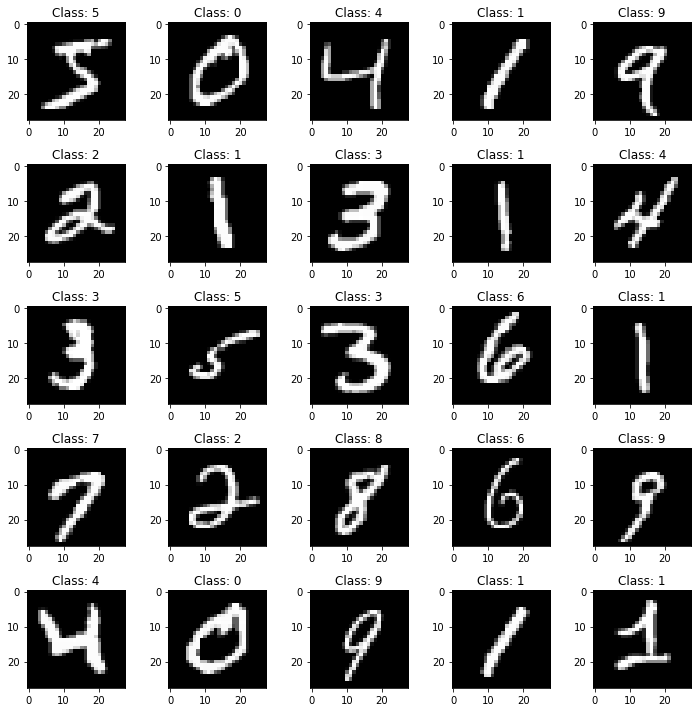

In [7]:
plt.figure(figsize = (10,10))   #wyciagamy elementy z bazy liczb
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx], cmap ='gray')
    plt.title('Class: {}'.format(y_train[idx]))
    
plt.tight_layout()

In [12]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1,img_rows, img_cols,1)
X_test = X_test.reshape(-1,img_rows, img_cols,1)

input_shape = (img_rows, img_cols,1) 

X_train.shape, X_test.shape

#((ilosc zdjec, rozmiar, rozmiar, ilosc kanalow))

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
if np.max(X_train) > 1: X_train = X_train /255 #normalnizowanie wartosci w zbiorze na przedział 0-1
if np.max(X_test)> 1: X_test = X_test /255

In [16]:
if len(y_train.shape) == 1:  #normalizujemy y, tak zeby zamiast pojedynczej wartosci model szacowal prawdopodobieństwo dla wszystkich klas
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [24]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size = (2,2)), #zmniejszamy 2krotnie
    
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size = (2,2)),
    
    Flatten(), #przejscie z jednego na drugie
    
    Dense(512, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])
    
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
## Trenowanie

In [27]:
model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs=3,
    validation_data = (X_test,y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 59s 981us/step - loss: 0.1640 - accuracy: 0.9516 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 2/3
60000/60000 [==============================] - 57s 947us/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0366 - val_accuracy: 0.9878
Epoch 3/3
60000/60000 [==============================] - 58s 966us/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0345 - val_accuracy: 0.9888


In [28]:
## Testowanie


In [29]:
score = model.evaluate(X_test, y_test, verbose=0)

In [30]:
score

[0.034525200894736915, 0.9887999892234802]